<div style="background-color: #B7A6C9; padding:20px; border-radius:10px">
  <h1 style="color:#000000; text-align:center;">💰 Predicting Loan Payback 💰 </h1>
</div>

# 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

# 2. Loading Data

In [2]:
train_df=pd.read_csv("/kaggle/input/playground-series-s5e11/train.csv")
test_df=pd.read_csv("/kaggle/input/playground-series-s5e11/test.csv")
ss_df=pd.read_csv("/kaggle/input/playground-series-s5e11/sample_submission.csv")

In [3]:
print("Training dataset shape :",train_df.shape)
print("Testing dataset shape :",test_df.shape)
print("Submission dataset shape :",ss_df.shape)

Training dataset shape : (593994, 13)
Testing dataset shape : (254569, 12)
Submission dataset shape : (254569, 2)


In [4]:
train_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [5]:
test_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


# 3. Initial Data Exploration

In [6]:
#Show informations about the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [7]:
#Display the statistical summary of the training dataset
train_df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [8]:
#Show informations about the testing dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254569 entries, 0 to 254568
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    254569 non-null  int64  
 1   annual_income         254569 non-null  float64
 2   debt_to_income_ratio  254569 non-null  float64
 3   credit_score          254569 non-null  int64  
 4   loan_amount           254569 non-null  float64
 5   interest_rate         254569 non-null  float64
 6   gender                254569 non-null  object 
 7   marital_status        254569 non-null  object 
 8   education_level       254569 non-null  object 
 9   employment_status     254569 non-null  object 
 10  loan_purpose          254569 non-null  object 
 11  grade_subgrade        254569 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 23.3+ MB


In [9]:
#Display the statistical summary of the testing dataset
test_df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
count,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000
mean,721278.000000,48233.080193,0.120583,681.037691,15016.753484,12.352323
std,73487.884676,26719.658580,0.068582,55.624118,6922.165182,2.017602
min,593994.000000,6011.770000,0.011000,395.000000,500.050000,3.200000
25%,657636.000000,27950.300000,0.072000,646.000000,10248.580000,10.980000
50%,721278.000000,46528.980000,0.096000,683.000000,15000.220000,12.370000
75%,784920.000000,61149.440000,0.156000,719.000000,18831.460000,13.690000
max,848562.000000,380653.940000,0.627000,849.000000,48959.260000,21.290000


In [10]:
train_df.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

# 4. Checking Data Quality

In [11]:
#Checking for missing values in the training dataset
train_df.isna().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [12]:
#Checking for missing values in the testing datset
test_df.isna().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64

In [13]:
# Checking for duplicates in the training dataset
print("The number of duplicated observations in the train dataset is equal to", train_df.duplicated().sum())

# Checking for duplicates in the testing dataset
print("The number of duplicated observations in the test dataset is equal to", test_df.duplicated().sum())

The number of duplicated observations in the train dataset is equal to 0
The number of duplicated observations in the test dataset is equal to 0


# 5. Exploratory Data Analysis

In [14]:
train_df.nunique().sort_values()

loan_paid_back               2
gender                       3
marital_status               4
education_level              5
employment_status            5
loan_purpose                 8
grade_subgrade              30
credit_score               399
debt_to_income_ratio       526
interest_rate             1454
loan_amount             111570
annual_income           119728
id                      593994
dtype: int64

In [15]:
train_df["gender"].value_counts() #categorical value

gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

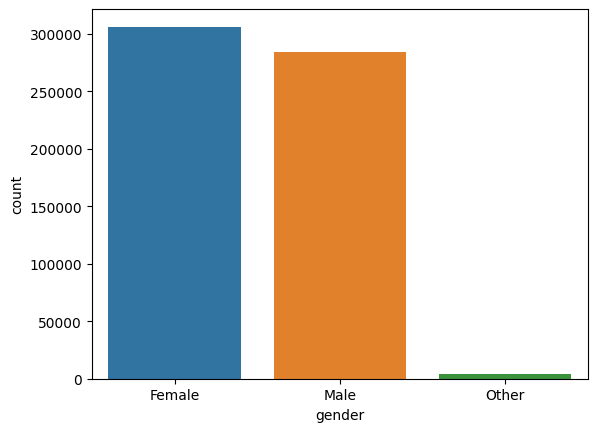

In [16]:
sns.countplot(data=train_df, x="gender")

plt.show()

In [17]:
train_df["marital_status"].value_counts() #categorical value

marital_status
Single      288843
Married     277239
Divorced     21312
Widowed       6600
Name: count, dtype: int64

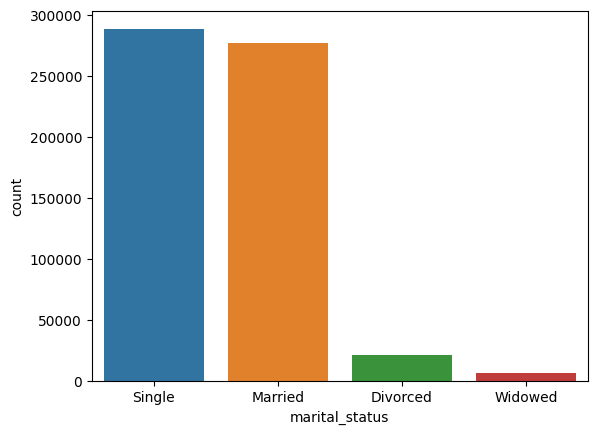

In [18]:
sns.countplot(data=train_df, x="marital_status")

plt.show()

In [19]:
train_df["education_level"].value_counts().sort_values() #categorical value

education_level
PhD             11022
Other           26677
Master's        93097
High School    183592
Bachelor's     279606
Name: count, dtype: int64

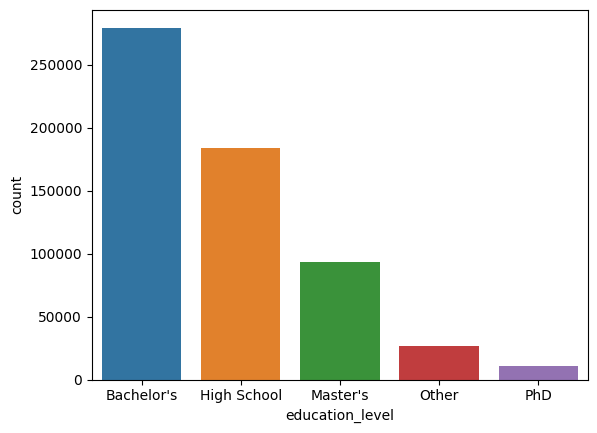

In [20]:
sns.countplot(data=train_df, x="education_level", order=train_df["education_level"].value_counts().sort_values(ascending=False).index)

plt.show()

In [21]:
train_df["employment_status"].value_counts().sort_values() #categorical value

employment_status
Student           11931
Retired           16453
Self-employed     52480
Unemployed        62485
Employed         450645
Name: count, dtype: int64

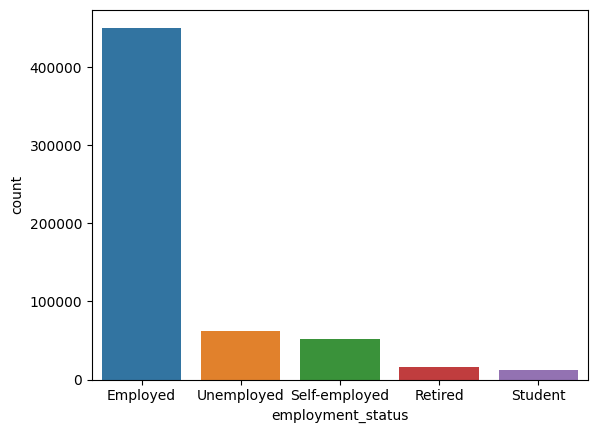

In [22]:
sns.countplot(data=train_df, x="employment_status", order=train_df["employment_status"].value_counts().sort_values(ascending=False).index)

plt.show()

In [23]:
train_df["loan_purpose"].value_counts().sort_values() #categorical value

loan_purpose
Vacation                8449
Medical                22806
Business               35303
Education              36641
Home                   44118
Car                    58108
Other                  63874
Debt consolidation    324695
Name: count, dtype: int64

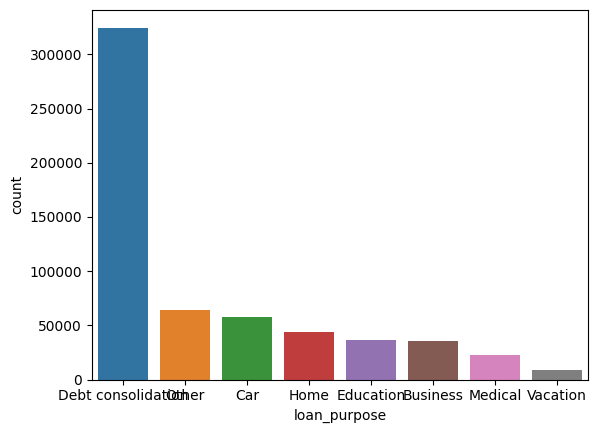

In [24]:
sns.countplot(data=train_df, x="loan_purpose", order=train_df["loan_purpose"].value_counts().sort_values(ascending=False).index)

plt.show()

In [25]:
train_df["grade_subgrade"].value_counts()

grade_subgrade
C3    58695
C4    55957
C2    54443
C1    53363
C5    53317
D1    37029
D3    36694
D4    35097
D2    34432
D5    32101
B2    15167
B1    14344
B5    13937
B3    13926
B4    13877
E4     8036
E3     7075
E1     6891
E2     6372
E5     6084
F5     5947
F4     5535
F1     5534
F2     5203
F3     5082
A5     2471
A3     2066
A2     2018
A4     1701
A1     1600
Name: count, dtype: int64

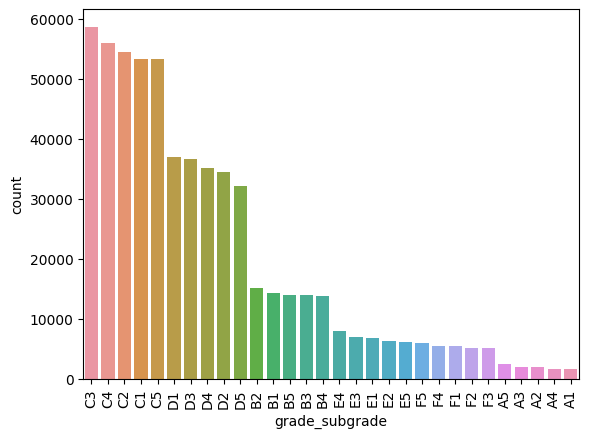

In [26]:
sns.countplot(data=train_df, x="grade_subgrade", order=train_df["grade_subgrade"].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

# 8. Submitting Predictions


In [27]:
#y_pred=best_grad_model.predict(test_df.drop(columns=['id']))

In [28]:
# submission = pd.DataFrame({'id': test_df['id'], 'BeatsPerMinute': y_pred})
# submission.to_csv('submission.csv', index=False)
# display(submission.head())